In [238]:
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



In [363]:
NAME='nottem' # AirPassengers, nottem, nhtemp
df = data(NAME)
df[:5]

,time,nottem
1,1920.000000,40.6
2,1920.083333,40.8
3,1920.166667,44.4
4,1920.250000,46.7
5,1920.333333,54.1


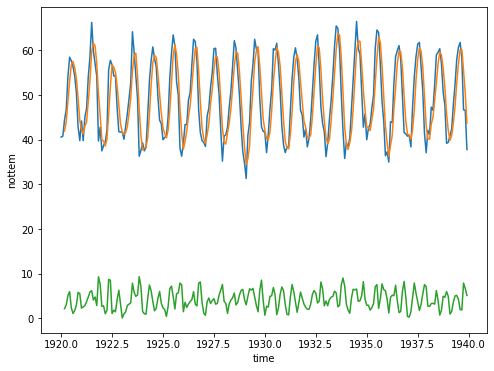

In [364]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='time',y=NAME)

rolling_mean = df[NAME].rolling(window = 3).mean()
plt.plot(df['time'],rolling_mean)

rolling_std = df.rolling(window = 3).std()
plt.plot(df['time'],rolling_std[NAME])

(31.3, 66.5)

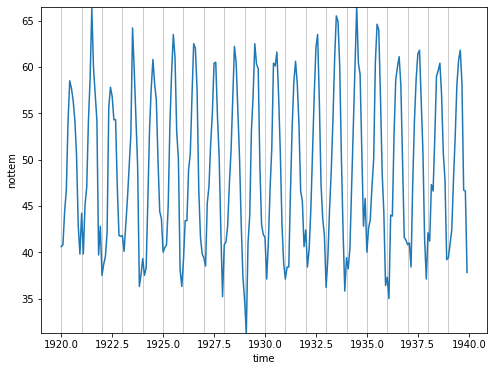

In [365]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='time',y=NAME)
x = list(range(int(min(df['time'])),int(max(df['time'])+1)))
for _ in x:
    sns.lineplot(x=_,y=[min(df[NAME]),max(df[NAME])],lw=1,color='black')
plt.ylim(min(df[NAME]),max(df[NAME]))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

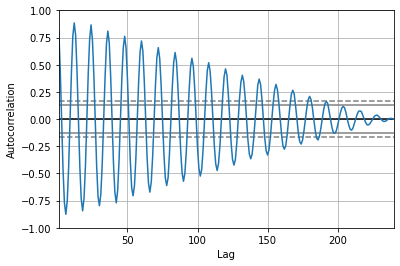

In [366]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[NAME])

                               SARIMAX Results                                
Dep. Variable:                 nottem   No. Observations:                  240
Model:                ARIMA(13, 1, 5)   Log Likelihood                -562.753
Date:                Fri, 22 Oct 2021   AIC                           1163.506
Time:                        19:35:45   BIC                           1229.558
Sample:                             0   HQIC                          1190.123
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1529      0.309      0.494      0.621      -0.453       0.759
ar.L2         -0.2815      0.339     -0.830      0.407      -0.946       0.383
ar.L3          0.1531      0.304      0.504      0.6

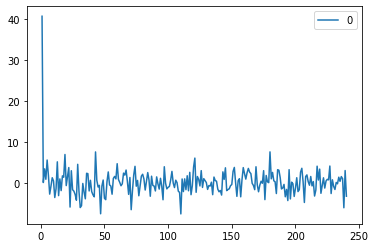

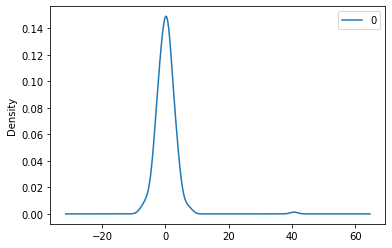

                0
count  240.000000
mean     0.260764
std      3.644246
min     -7.426196
25%     -1.542013
50%      0.209336
75%      1.656903
max     40.600000


In [367]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df[NAME], order=(13,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [368]:
Y = df[NAME].values
split = int(len(Y) * 0.6)
_train = Y[:split]
test = Y[split:]
train = [x for x in _train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(train, order=(5,1,0))
	model_fit = model.fit()
	out = model_fit.forecast()
	predictions.append(out[0])
	obs = test[t]
	train.append(obs)
	print(f'TEST = {out[0]} - PRED = {obs}')
rmse = math.sqrt(mean_squared_error(df[NAME][split:], predictions))
print(f"RMSE: {rmse}")


TEST = 41.402849739711286 - PRED = 42.4
TEST = 44.98677544422222 - PRED = 38.4
TEST = 40.89356646402134 - PRED = 40.3
TEST = 41.30627746643665 - PRED = 44.6
TEST = 46.8618352653842 - PRED = 50.9
TEST = 53.78300680886468 - PRED = 57.0
TEST = 60.710496204695204 - PRED = 62.1
TEST = 62.96572378067726 - PRED = 63.5
TEST = 62.029719658314285 - PRED = 56.3
TEST = 51.52548934584137 - PRED = 47.3
TEST = 40.01301283684673 - PRED = 43.6
TEST = 38.266897712420274 - PRED = 41.8
TEST = 42.10410776521345 - PRED = 36.2
TEST = 39.62762657731129 - PRED = 39.3
TEST = 42.48980100240633 - PRED = 44.5
TEST = 47.95664695607959 - PRED = 48.7
TEST = 53.0849952631535 - PRED = 54.2
TEST = 57.471096944693365 - PRED = 60.8
TEST = 61.02633428015838 - PRED = 65.5
TEST = 65.3085017814407 - PRED = 64.9
TEST = 63.16106592717798 - PRED = 60.1
TEST = 55.31700084426568 - PRED = 50.2
TEST = 43.28190046938442 - PRED = 42.1
TEST = 36.31392978853344 - PRED = 35.8
TEST = 33.827036013846914 - PRED = 39.4
TEST = 42.990694035615

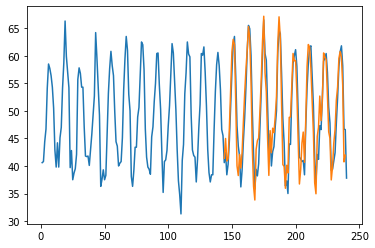

In [369]:
plt.plot(df[NAME])
plt.plot(range(split,len(Y)),predictions)

In [370]:
Y = df[NAME].values
split = int(len(Y) * 0.8)
_train = Y[:split]

df_result = pd.DataFrame()

for p in [0,1,2,3,4]:
    for d in [0,1,2]:
        for q in [0,1,2]:
            test = Y[split:len(Y)]
            train = [x for x in _train] 
            predictions = list()
            for t in range(len(test)):
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()
                out = model_fit.forecast()
                predictions.append(out[0])
                obs = test[t]
                train.append(obs)
            rmse = math.sqrt(mean_squared_error(df[NAME][split:], predictions))
            df_result = df_result.append({'p':int(p),'d':int(d),'q':int(q),'rmse':rmse}, ignore_index=True)
            print(f"ARIMA({p},{d},{q}) - RMSE = {rmse}")

ARIMA(0,0,0) - RMSE = 8.367438341625492
ARIMA(0,0,1) - RMSE = 5.757085466171811
ARIMA(0,0,2) - RMSE = 4.711831758633172
ARIMA(0,1,0) - RMSE = 5.143604443060009
ARIMA(0,1,1) - RMSE = 4.910403813065212
ARIMA(0,1,2) - RMSE = 4.42656471050449
ARIMA(0,2,0) - RMSE = 5.61627100485893
ARIMA(0,2,1) - RMSE = 5.19554003015378
ARIMA(0,2,2) - RMSE = 5.003586066572443
ARIMA(1,0,0) - RMSE = 4.9030181554735695
ARIMA(1,0,1) - RMSE = 4.600790667553093
ARIMA(1,0,2) - RMSE = 4.050862559356736
ARIMA(1,1,0) - RMSE = 4.730755171511578
ARIMA(1,1,1) - RMSE = 4.697935876344703
ARIMA(1,1,2) - RMSE = 4.602225982268384
ARIMA(1,2,0) - RMSE = 5.058162910621207
ARIMA(1,2,1) - RMSE = 5.046499873852988
ARIMA(1,2,2) - RMSE = 4.99730182375823
ARIMA(2,0,0) - RMSE = 4.1279448238272405
ARIMA(2,0,1) - RMSE = 3.0219697600220745
ARIMA(2,0,2) - RMSE = 2.3493397430645326
ARIMA(2,1,0) - RMSE = 4.646088439967182
ARIMA(2,1,1) - RMSE = 4.585483859724447
ARIMA(2,1,2) - RMSE = 3.0546278179231448
ARIMA(2,2,0) - RMSE = 5.041867330478515

<AxesSubplot:xlabel='d', ylabel='q'>

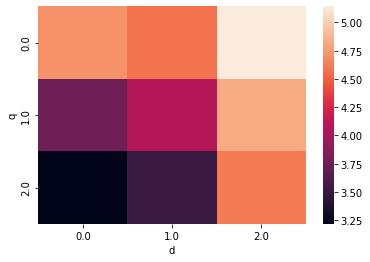

In [371]:
__ = df_result[['q','d','rmse']]
__ = __.groupby(['q','d'],as_index=False).mean()
_ = __.pivot('q','d','rmse')
sns.heatmap(_)

<AxesSubplot:xlabel='q', ylabel='p'>

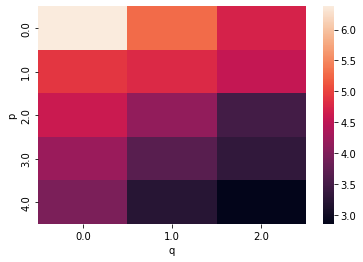

In [372]:
__ = df_result[['p','q','rmse']]
__ = __.groupby(['p','q'],as_index=False).mean()
_ = __.pivot('p','q','rmse')
sns.heatmap(_)

<AxesSubplot:xlabel='d', ylabel='p'>

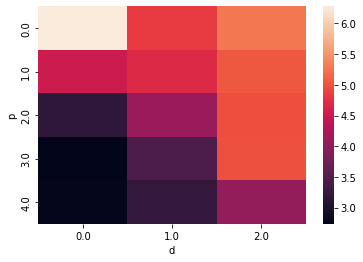

In [373]:
__ = df_result[['p','d','rmse']]
__ = __.groupby(['p','d'],as_index=False).mean()
_ = __.pivot('p','d','rmse')
sns.heatmap(_)